# **DAB 103: Project #1**
# **Exploratory Data Analysis of Dataset 'Major Crime Indicators'**

**Import the necessary libraries**

In [225]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Mount Drive**

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
# Project Directory path 
project_dir ='/content/drive/MyDrive/Major_Crime_Indicators.csv'


In [228]:
print(project_dir+'*')

/content/drive/MyDrive/Major_Crime_Indicators.csv*


**Load the dataset**

In [229]:
df = pd.read_csv(project_dir)

In [230]:
df

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8850397.689,5429358.510,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8818405.323,5436836.021,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8853790.925,5402070.833,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8832821.801,5419627.832,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8853452.390,5410706.417,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301228,-8844901.008,5433057.426,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,28.0,179.0,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8820394.722,5430802.804,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,28.0,179.0,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8825524.686,5429270.662,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,20.0,140.0,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000,0.000,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232


In [231]:
#Display the top  n (by default 5) rows of a DataFrame df
df.head()


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8850397.689,5429358.510,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8818405.323,5436836.021,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8853790.925,5402070.833,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8832821.801,5419627.832,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8853452.390,5410706.417,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5


In [232]:
#Display the number of rows and columns of the DataFrame df
df.shape


(301233, 30)

In [233]:
#Display the last  n (by default 5) rows of a DataFrame df
df.tail()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
301228,-8844901.008,5433057.426,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,28.0,179.0,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8820394.722,5430802.804,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,28.0,179.0,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8825524.686,5429270.662,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,20.0,140.0,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000,0.000,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232
301232,-8854585.124,5426966.055,301117,GO-20221236298,D31,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,16,Auto Theft,22,Humbermede,-79.542092,43.750849,301233


In [234]:
#Display a list of all the column names in the DataFrame
df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude', 'Latitude',
       'ObjectId'],
      dtype='object')

In [235]:
#Display the number of rows and columns of the DataFrame df
df.shape


(301233, 30)

In [236]:
#Display statistical summary of the DataFrame df
df.describe()


,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Longitude,Latitude,ObjectId
count,3.012330e+05,3.012330e+05,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301133.000000,301133.000000,301133.000000,301233.000000,301233.000000,301233.000000,301233.000000
mean,-8.724562e+06,5.350375e+06,150617.000000,1702.422928,146.565585,2017.876713,15.736659,180.765756,12.808786,2017.822852,15.456476,180.544766,12.601591,-78.374071,43.143874,150617.000000
std,9.966746e+05,6.112283e+05,86958.621157,326.260102,51.988967,2.436940,8.766766,103.717225,6.502562,2.475716,8.914754,104.141362,7.243753,8.953280,4.928613,86958.621157
min,-8.910331e+06,0.000000e+00,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-80.042866,0.000000,1.000000
25%,-8.846681e+06,5.412946e+06,75309.000000,1430.000000,100.000000,2016.000000,8.000000,92.000000,8.000000,2016.000000,8.000000,92.000000,7.000000,-79.471086,43.659806,75309.000000
50%,-8.838015e+06,5.419000e+06,150617.000000,1450.000000,100.000000,2018.000000,16.000000,178.000000,13.000000,2018.000000,15.000000,178.000000,14.000000,-79.393238,43.699132,150617.000000
75%,-8.829868e+06,5.426986e+06,225925.000000,2120.000000,200.000000,2020.000000,23.000000,270.000000,18.000000,2020.000000,23.000000,270.000000,19.000000,-79.320056,43.750978,225925.000000
max,0.000000e+00,5.517228e+06,301233.000000,2135.000000,230.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,0.000000,44.333691,301233.000000


In [237]:
#Display the summary of the DataFrame df, including the number of non-null values, the data type of each column, and the memory usage of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301233 entries, 0 to 301232
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    301233 non-null  float64
 1   Y                    301233 non-null  float64
 2   Index_               301233 non-null  int64  
 3   event_unique_id      301233 non-null  object 
 4   Division             301233 non-null  object 
 5   occurrencedate       301233 non-null  object 
 6   reporteddate         301233 non-null  object 
 7   location_type        301233 non-null  object 
 8   premises_type        301233 non-null  object 
 9   ucr_code             301233 non-null  int64  
 10  ucr_ext              301233 non-null  int64  
 11  offence              301233 non-null  object 
 12  reportedyear         301233 non-null  int64  
 13  reportedmonth        301233 non-null  object 
 14  reportedday          301233 non-null  int64  
 15  reporteddayofyear

In [238]:
#Display datatypes of each columns of the DataFrame df
df.dtypes


X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
Division                object
occurrencedate          object
reporteddate            object
location_type           object
premises_type           object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
mci_category            object
Hood_ID                 object
Neighbourhood           object
Longitude              float64
Latitude               float64
ObjectId                 int64
dtype: object

In [239]:
#Display the number of missing values for each column of the DataFrame df
df.isnull().sum()

X                        0
Y                        0
Index_                   0
event_unique_id          0
Division                 0
occurrencedate           0
reporteddate             0
location_type            0
premises_type            0
ucr_code                 0
ucr_ext                  0
offence                  0
reportedyear             0
reportedmonth            0
reportedday              0
reporteddayofyear        0
reporteddayofweek        0
reportedhour             0
occurrenceyear         100
occurrencemonth        100
occurrenceday          100
occurrencedayofyear    100
occurrencedayofweek    100
occurrencehour           0
mci_category             0
Hood_ID                  0
Neighbourhood            0
Longitude                0
Latitude                 0
ObjectId                 0
dtype: int64

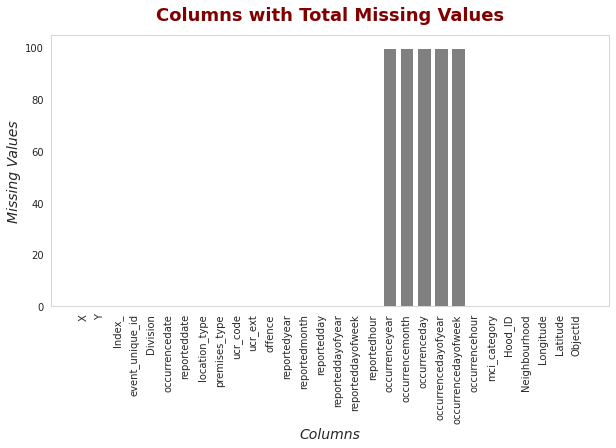

In [240]:
#Plot the number of missing values for each column of the DataFrame df
plt.figure(figsize=(10,5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values, color = "Grey")
plt.xlabel('Columns',fontsize=14, fontstyle='italic')
plt.ylabel('Missing Values',fontsize=14, fontstyle='italic')
plt.title('Columns with Total Missing Values', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [241]:
#Display the count of unique values in each columns of the Dataframe df
df.nunique()

X                       19679
Y                       19678
Index_                 301233
event_unique_id        262439
Division                   18
occurrencedate           3561
reporteddate             3103
location_type              52
premises_type               7
ucr_code                   22
ucr_ext                    16
offence                    51
reportedyear                9
reportedmonth              12
reportedday                31
reporteddayofyear         366
reporteddayofweek           7
reportedhour               24
occurrenceyear             23
occurrencemonth            12
occurrenceday              31
occurrencedayofyear       366
occurrencedayofweek         7
occurrencehour             24
mci_category                5
Hood_ID                   141
Neighbourhood             141
Longitude               19679
Latitude                19678
ObjectId               301233
dtype: int64

In [242]:
#Display invalid records from each row of the Datafram df
invalid_records = []
for index, row in df.iterrows():
    if any(pd.isnull(row)):
        invalid_records.append(index)
    elif any(isinstance(x, str) and x.strip() == '' for x in row.values):
        invalid_records.append(index)
print('Invalid records:', invalid_records)


Invalid records: [104, 452, 1551, 1552, 3091, 3092, 4830, 5617, 5618, 5619, 5755, 5758, 9144, 9764, 9765, 9766, 13764, 21543, 25025, 25026, 26410, 26524, 27124, 27900, 30636, 32267, 33458, 35250, 38792, 40847, 41484, 43195, 46230, 46238, 47372, 47731, 53337, 58879, 61991, 68467, 76798, 79530, 89327, 89328, 91309, 100934, 123033, 128104, 134090, 138125, 147201, 149870, 153996, 154221, 157679, 158056, 159664, 161139, 163445, 163446, 166849, 166850, 166851, 166852, 166853, 166854, 166855, 166856, 172315, 172316, 172553, 174499, 175525, 177266, 177995, 178716, 178717, 199636, 210573, 219792, 219793, 222398, 238993, 239824, 240038, 240294, 245912, 247389, 252794, 258191, 259136, 268943, 270340, 275286, 281928, 284204, 294376, 294377, 299190, 299982]


In [243]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

In [244]:
# select categorical columns
cat_cols = ['Division', 'location_type', 'premises_type',
       'offence','occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofweek',
       'mci_category','Neighbourhood']

# calculate frequency counts
for col in cat_cols:
   print(df[col].value_counts())

D51    25784
D32    22866
D31    22057
D14    21732
D41    21484
D43    21399
D23    19231
D22    18635
D52    18330
D42    18264
D55    17676
D53    15282
D33    13027
D12    12858
D11    12078
D13    10867
D54     6344
NSA     3319
Name: Division, dtype: int64
Apartment (Rooming House, Condo)                                          72061
Single Home, House (Attach Garage, Cottage, Mobile)                       54076
Streets, Roads, Highways (Bicycle Path, Private Road)                     47619
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    34774
Parking Lots (Apt., Commercial Or Non-Commercial)                         25322
Bar / Restaurant                                                          12031
Open Areas (Lakes, Parks, Rivers)                                          6278
Schools During Supervised Activity                                         4567
Convenience Stores                                                         3851
Ttc Subway Statio

   Division  count
0       D11  12078
1       D12  12858
2       D13  10867
3       D14  21732
4       D22  18635
5       D23  19231
6       D31  22057
7       D32  22866
8       D33  13027
9       D41  21484
10      D42  18264
11      D43  21399
12      D51  25784
13      D52  18330
14      D53  15282
15      D54   6344
16      D55  17676
17      NSA   3319


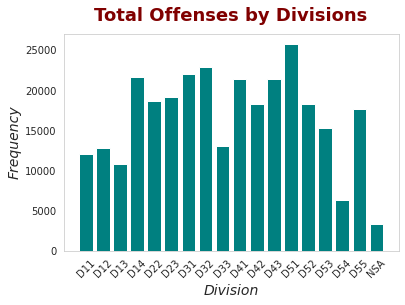

In [245]:
#Calculate the number of occurrences of each geographic police division
df_division = df.groupby('Division').count()['X'].reset_index()
df_division = df_division.rename(columns={'X': 'count'})
print(df_division)

#Plot the count of occurrences of each division
plt.bar(df_division['Division'], df_division['count'], color = "teal")
plt.xlabel('Division',fontsize=14, fontstyle='italic')
plt.ylabel('Frequency',fontsize=14, fontstyle='italic')
plt.title('Total Offenses by Divisions', fontsize=18, fontweight='bold', y=1.03,color = '#800000')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

    occurrenceyear  count
0           2000.0     26
1           2001.0     21
2           2002.0     17
3           2003.0     15
4           2004.0     27
5           2005.0     25
6           2006.0     12
7           2007.0     34
8           2008.0     47
9           2009.0     73
10          2010.0     96
11          2011.0    130
12          2012.0    186
13          2013.0    596
14          2014.0  32467
15          2015.0  32920
16          2016.0  33608
17          2017.0  35501
18          2018.0  37440
19          2019.0  39967
20          2020.0  34973
21          2021.0  34277
22          2022.0  18675


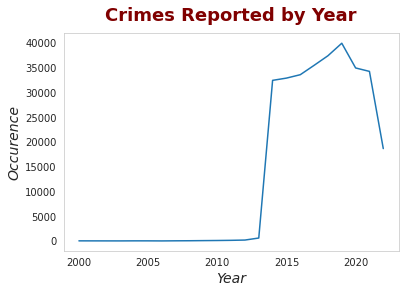

In [246]:
#Calculate the number of occurrences in each year
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df['year'] = df['occurrencedate'].dt.year
df_year = df.groupby('occurrenceyear').count()['X'].reset_index()
df_year = df_year.rename(columns={'X': 'count'})
print(df_year)

#Plot the distribution of occurrences in each year
plt.plot(df_year['occurrenceyear'], df_year['count'])
plt.xlabel('Year',fontsize=14, fontstyle='italic')
plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
plt.title('Crimes Reported by Year', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.grid(False)
plt.show()


Assault            161833
Break and Enter     59440
Auto Theft          40794
Robbery             29230
Theft Over           9936
Name: mci_category, dtype: int64


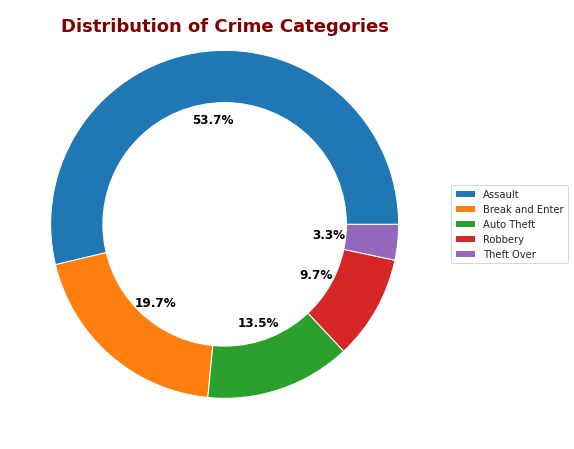

In [247]:
# Check the different crime categories and their counts
category_counts = df['mci_category'].value_counts()
print(category_counts)

# Plot the distribution of crime categories
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(category_counts.index, loc='right', bbox_to_anchor=(1.3, 0.5))
plt.title('Distribution of Crime Categories',fontsize=18, fontweight='bold', y=0.93, color = '#800000')
plt.show()

mci_category    Assault  Auto Theft  Break and Enter  Robbery  Theft Over
occurrenceyear                                                           
2000.0             20.0         2.0              NaN      NaN         4.0
2001.0             19.0         1.0              1.0      NaN         NaN
2002.0             13.0         NaN              2.0      NaN         2.0
2003.0             15.0         NaN              NaN      NaN         NaN
2004.0             22.0         NaN              NaN      3.0         2.0
2005.0             24.0         NaN              NaN      NaN         1.0
2006.0             11.0         NaN              NaN      NaN         1.0
2007.0             32.0         NaN              NaN      NaN         2.0
2008.0             40.0         3.0              NaN      1.0         3.0
2009.0             64.0         1.0              1.0      NaN         7.0
2010.0             80.0         5.0              5.0      NaN         6.0
2011.0            112.0         3.0   

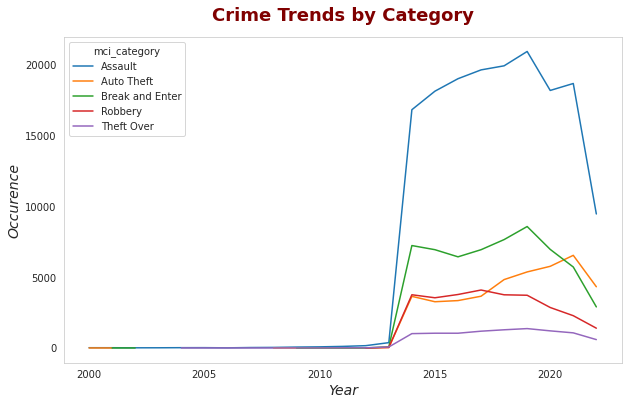

In [248]:
#Check the different crime categories occured every year and their counts
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df['year'] = df['occurrencedate'].dt.year
df_year = df.groupby('occurrenceyear').count()['X'].reset_index()
df_year = df_year.rename(columns={'X': 'count'})
pv2 = pd.pivot_table(df, values='X', index='occurrenceyear', columns='mci_category', aggfunc='count')
print(pv2)

#Plot the distribution of crime categories in each year
pv2.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year',fontsize=14, fontstyle='italic')
plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
plt.title('Crime Trends by Category', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.grid(False)

plt.show()

                    Neighbourhood  count
0                 Agincourt North   1561
1    Agincourt South-Malvern West   2345
2                       Alderwood    835
3                           Annex   4680
4               Banbury-Don Mills   1669
..                            ...    ...
136                      Wychwood   1160
137                Yonge-Eglinton   1154
138                Yonge-St.Clair    596
139       York University Heights   5890
140            Yorkdale-Glen Park   3040

[141 rows x 2 columns]
                         Neighbourhood  count
123  Waterfront Communities-The Island  11302
23               Church-Yonge Corridor   9942
6                  Bay Street Corridor   8530
125             West Humber-Clairville   8103
79                           Moss Park   7287
139            York University Heights   5890
33                Downsview-Roding-CFB   5730
62                Kensington-Chinatown   5708
133                             Woburn   5352
84                      

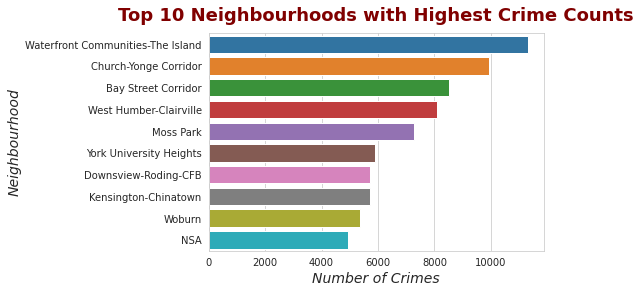

In [249]:
#Check the count of occurrences of each neighbourhood 
df_neighbourhood = df.groupby('Neighbourhood').count()['X'].reset_index()
df_neighbourhood = df_neighbourhood.rename(columns={'X': 'count'})
print(df_neighbourhood)

#Plot the top 10 neighbourhoods with the highest crime counts
top10_neighbourhoods = df_neighbourhood.sort_values(by='count', ascending=False).head(10)
print(top10_neighbourhoods)
ax = sns.barplot(x='count', y='Neighbourhood', data=top10_neighbourhoods)
ax.set_title('Top 10 Neighbourhoods with Highest Crime Counts', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.set_ylabel('Neighbourhood',fontsize=14, fontstyle='italic')

plt.show()

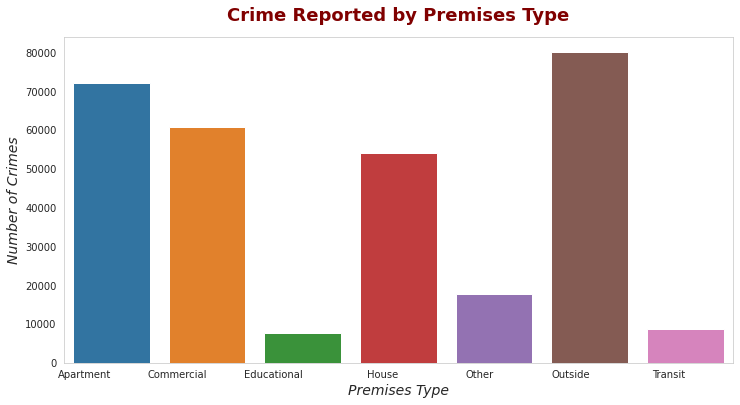

In [250]:
# Group by premises type and count the number of crimes
df_premises = df.groupby('premises_type').count()['X'].reset_index()
df_premises = df_premises.rename(columns={'X': 'Count'})

# Plot a bar graph
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='premises_type', y='Count', data=df_premises)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
ax.set_title('Crime Reported by Premises Type', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Premises Type',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

  occurrencedayofweek  count
0          Friday      45531
2          Saturday    44649
3          Sunday      43006
6          Wednesday   42373
4          Thursday    42364
1          Monday      41926
5          Tuesday     41284


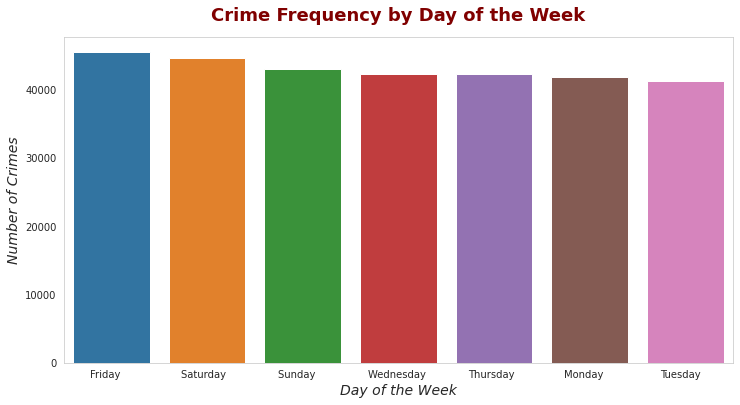

In [251]:
#Check the count of occurrences during each day of the week
df_dayofweek = df.groupby('occurrencedayofweek').count()['X'].reset_index()
df_dayofweek = df_dayofweek.rename(columns={'X': 'count'})
df_dayofweek = df_dayofweek.sort_values(by='count', ascending=False)
print(df_dayofweek)

#Plot the count of occurrences during the week
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='occurrencedayofweek', y='count', data=df_dayofweek)
ax.set_title('Crime Frequency by Day of the Week', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Day of the Week',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

Text(0.5, 1.03, 'Correlation Matrix of Crime Data')

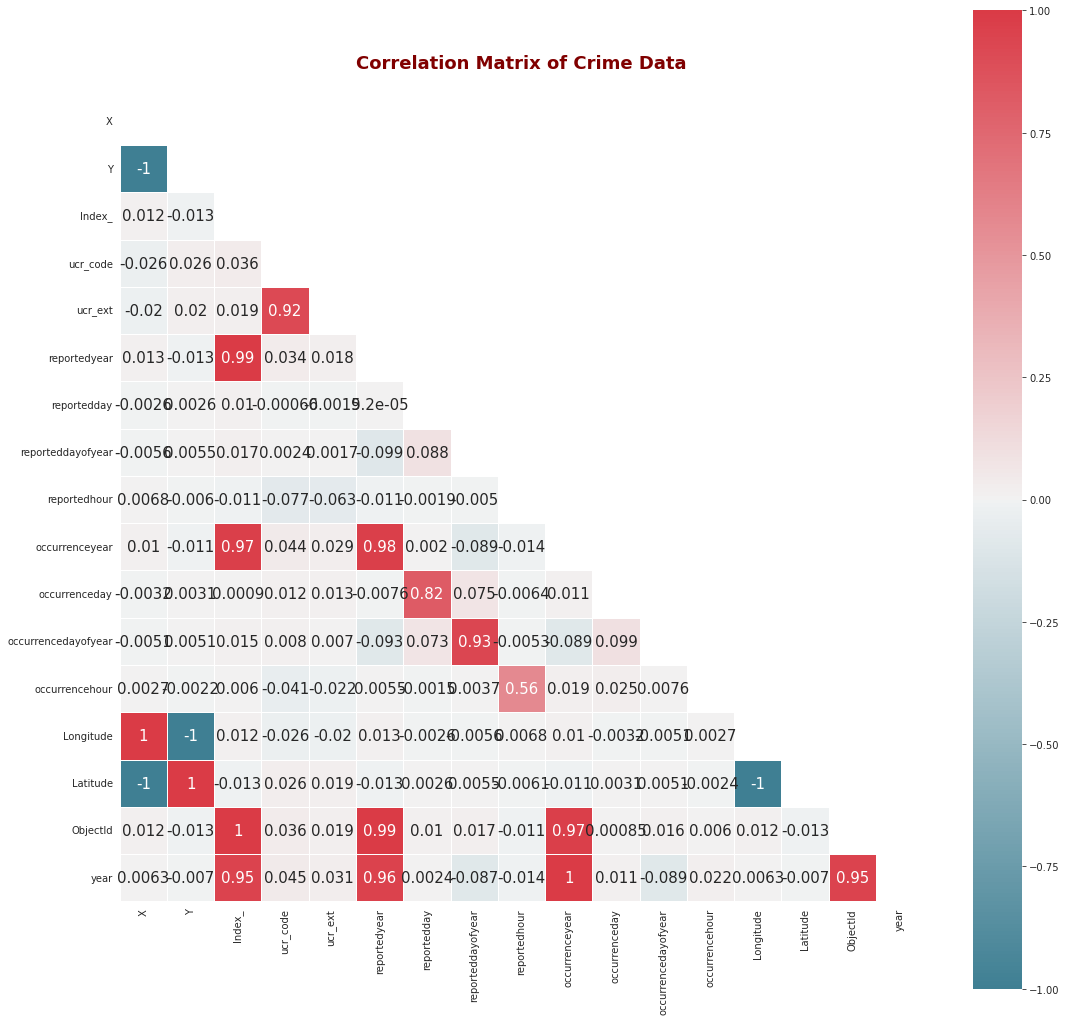

In [252]:
#correlation matrix  using the Pearson correlation coefficient method
corrmat = df.corr(method='pearson')
sns.set_style("white")
corrmat = df.corr(method='pearson')
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Plot Heatmap of the correlation matrix 
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1}, annot=True, annot_kws={'size': 15})
plt.title('Correlation Matrix of Crime Data', fontsize=18, fontweight='bold', y=1.03, color = '#800000')